Partner: Zora Anetor-Ebhabha

Date: 10/10/23

# Objectives

# Install and import libraries

In [1]:
!pip uninstall tensorflow -y 1>/dev/null
!pip install whit-phys-util 1>/dev/null

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import whit_phys_util as buc

Mounted at /content/drive


# Connect to GitHub

In [6]:
repo = buc.local_repository("https://github.com/PS251-FA23/two-slit-dim-tub")

Repository exists at this location. Pulling changes from GitHub.


# Equipment

| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| Two-slit interference, one-photon-at-a-time apparatus | TeachSpin | TWS2-A | None |
| Multimeter | Fluke | 179 | 58870155
| Digital Oscilloscope | Siglent | SDS 1052DL | SDS100P1151567
| Digital Counter | TeachSpin | PC/ITT 1-A | CT111


In [4]:
centerLocation = 4.100 # position of central max in mm
distanceToDetector = 498 # distance from double slit to detector in mm

# Initital observations of photon detections

## Oscilloscope setings
* Ch 1 Vertical Scale: 5o mV / div
* Horizontal scale: 50 ns / div
* Coupling for Ch 1: DC
* Trigger: edge, rising, Ch 1
* Trigger Level: +24 mV

## Observations of pulses

### PMT voltage at

# Analysis

In [13]:
df = pd.read_excel("TwoSlitDimData.xlsx", sheet_name="Sheet1")
df.head()

,Location (mm),PMT Counts
0,3.30,2060
1,3.35,2100
2,3.40,2380
3,3.45,2590
4,3.50,2800


In [15]:
df['x (mm)'] = df['Location (mm)'] - centerLocation

In [16]:
df['Count uncertainty'] = 2*np.sqrt(df['PMT Counts'])

In [25]:
def I_ts(x, I0, a, wavelength, x0, dI):
  d = 0.406 # mm
  q = np.arctan((x-x0)/distanceToDetector)
  I2s = I0*np.sinc(a*np.sin(q)/wavelength)**2*np.cos(np.pi*d*np.sin(q)/wavelength)**2
  return I2s +dI

In [ ]:
param1, cov1 = curve_fit(I_ts,)

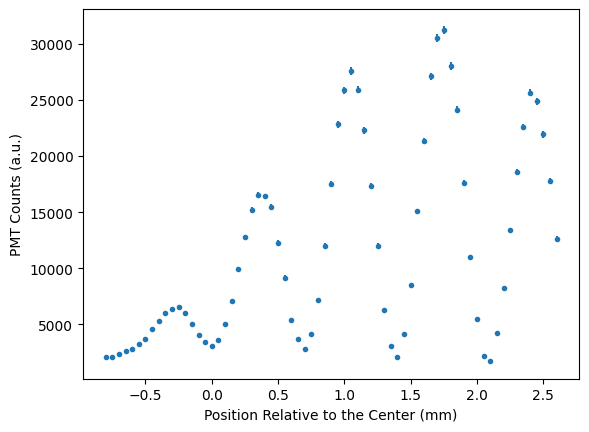

In [23]:
fig_pmt, ax_pmt = plt.subplots();
ax_pmt.errorbar(df['x (mm)'],df['PMT Counts'],yerr=df['Count uncertainty'],fmt='.');
ax_pmt.set_xlabel("Position Relative to the Center (mm)");
ax_pmt.set_ylabel("PMT Counts (a.u.)");

# Conclusion

Our photomultiplier appears to be damaged.  Despite numerous attempts to achieve discernible pulses on our oscilloscope, no intelligible reading was achieved.  Oscilloscope was set up according to the lab manual with the settings listed above.  Two-slit interference apparatus was checked for alignment multiple times.  Voltage read on Fluke multimeter maxed at 0.900 V.  The photomultiplier was set to 6.57 a.u.  Dr. Schipf and Dr. Larkin both attempted to fix the experimental setup to provide us with accurate data to no avail.

Since data was not able to be collected, no real conclusions can be made.